# **CALIFORNIA HOUSE PRICE PREDICTION**

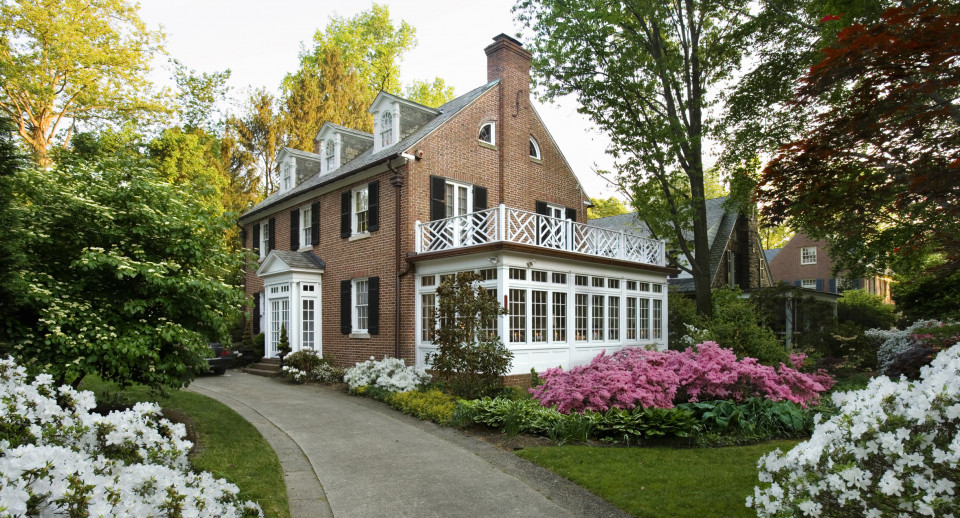

## **Features Information:**<br>
**Continuous Attributes - 13**<br>

**Multiclass Attribute - 1**

- longitude: The longitude of the house's location. It indicates the geographic location of the house in terms of east or west position relative to the Prime Meridian.

- latitude: The latitude of the house's location. It represents the north or south position relative to the Equator.

- housing_median_age: The median age of the houses in the block. This attribute gives an idea of how old the houses are on average in that area.

- total_rooms: The total number of rooms in the house. This includes all rooms such as bedrooms, bathrooms, living rooms, etc.

- total_bedrooms: The total number of bedrooms in the house. This attribute provides information on how many bedrooms are in the house.

- population: The total number of people residing in the block. This is a measure of the population density of the area.

- households: The number of households in the block. A household typically refers to a group of people living together in a single dwelling.

- median_income: The median income of households in the block, - expressed in tens of thousands of dollars. This is a key economic indicator for the area.

- median_house_value: The median house value in the block, expressed in dollars. This is the target variable for predicting house prices in many machine learning models.

- ocean_proximity: This categorical attribute indicates the proximity of the house to the ocean. Possible values include categories like "NEAR BAY," "NEAR OCEAN," "ISLAND," "INLAND," and "OUTLYING."

>### IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit

># **DATASET OVERVIEW**

In [2]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


`"total_bedrooms" feature got missing values`

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


> ### DISTRIBUTIONS OF THE FEATURES

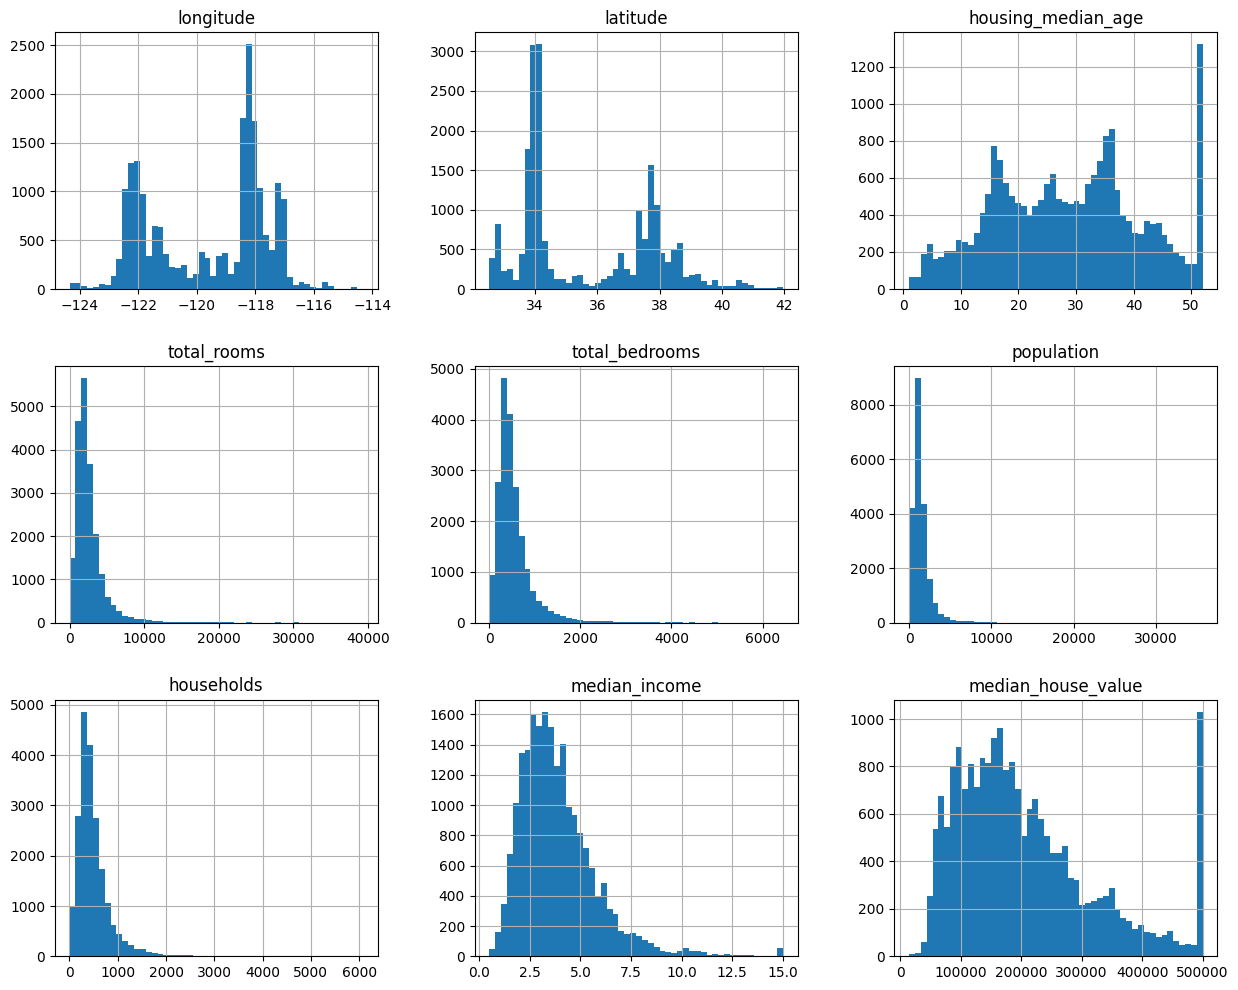

In [5]:
housing.hist(bins=50, figsize=(15, 12))
plt.show()

`Some of the distributions are right skewed, This makes harder for ML Algorithms to detect patterns.`

<hr>

> # **DATA VISUALIZATION**

In [6]:
# Creating a copy of dataset for performing some operations which required just for visulization  
temp_housing1 = housing.copy()

> ### Encoding "Ocean_proximity" feature

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
temp_housing1['ocena_num'] = encoder.fit_transform(temp_housing1['ocean_proximity'])
temp_housing1 = temp_housing1.drop("ocean_proximity", axis=1) 
temp_housing1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocena_num
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [8]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

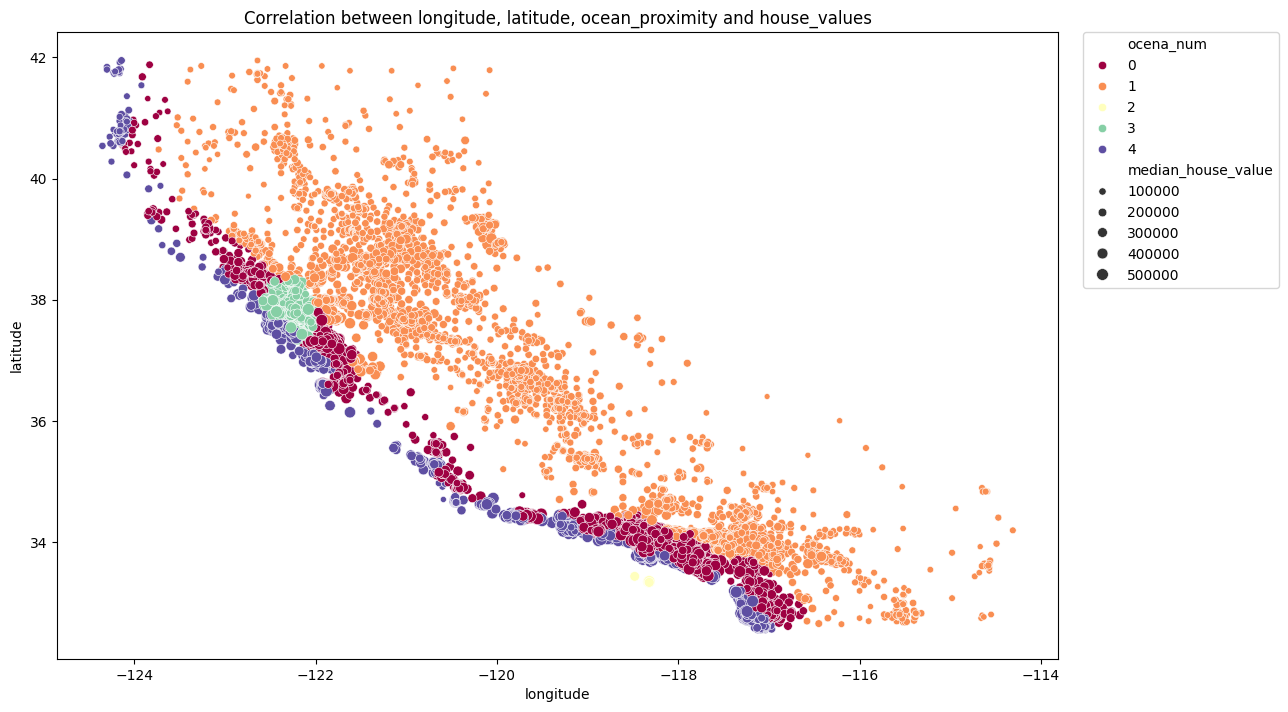

In [9]:
import seaborn as sns

scatter_plot = plt.figure(figsize=(13, 7))
sns.scatterplot(
    x = temp_housing1['longitude'],
    y = temp_housing1['latitude'],
    size = temp_housing1['median_house_value'],
    hue = temp_housing1['ocena_num'],
    palette = "Spectral"
)
plt.legend(bbox_to_anchor=(1.22, 1),
           borderaxespad=0)
plt.tight_layout()

plt.title("Correlation between longitude, latitude, ocean_proximity and house_values")

plt.show()

> Housing values are `higher in the Bay Area` and  the `area near the ocean`, and they `decrease as you move towards land region`

> `Longitude and Latitude` are seems to be `negatively correlated` with `Housing Values`

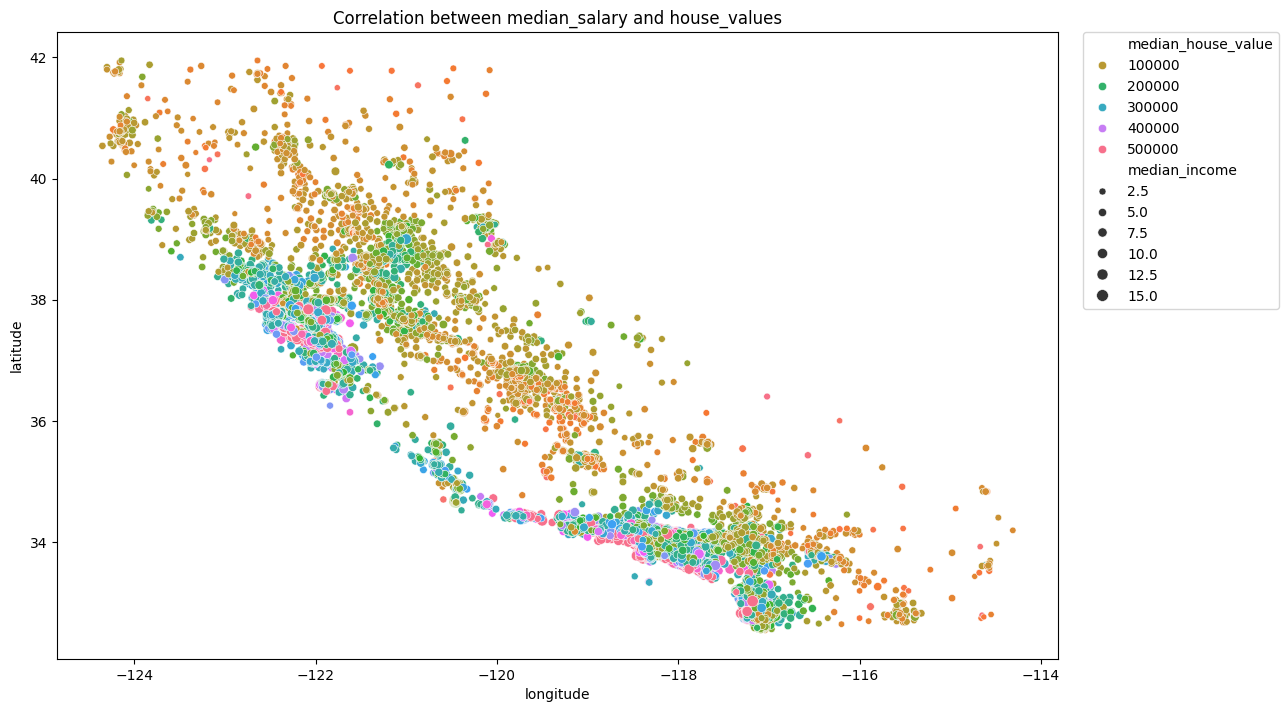

In [10]:
scatter_plot = plt.figure(figsize=(13, 7))
sns.scatterplot(
    x = temp_housing1['longitude'],
    y = temp_housing1['latitude'],
    size = temp_housing1['median_income'],
    hue = temp_housing1['median_house_value'],
    palette = "husl"
)
plt.legend(bbox_to_anchor=(1.22, 1),
           borderaxespad=0)
plt.tight_layout()

plt.title("Correlation between median_salary and house_values")

plt.show()

> `Median Salary` is `strongly correlated` with Housing Values

> ### LOOKING FOR CORRELATIONS

In [11]:
corr_matrix = housing.corr(numeric_only=True)

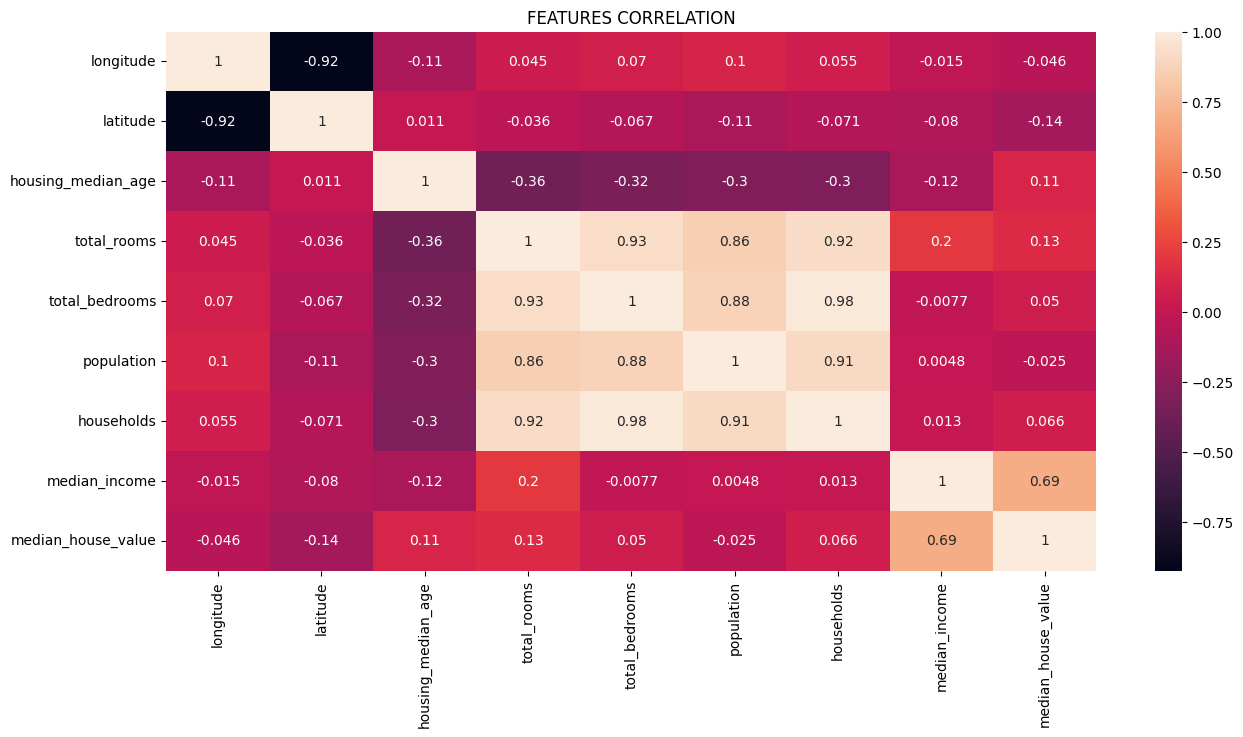

In [12]:
plt.figure(figsize=(15, 7))
sns.heatmap(data=corr_matrix, annot=True, cbar=True)
plt.title("FEATURES CORRELATION")
plt.show()

<Figure size 1500x1500 with 0 Axes>

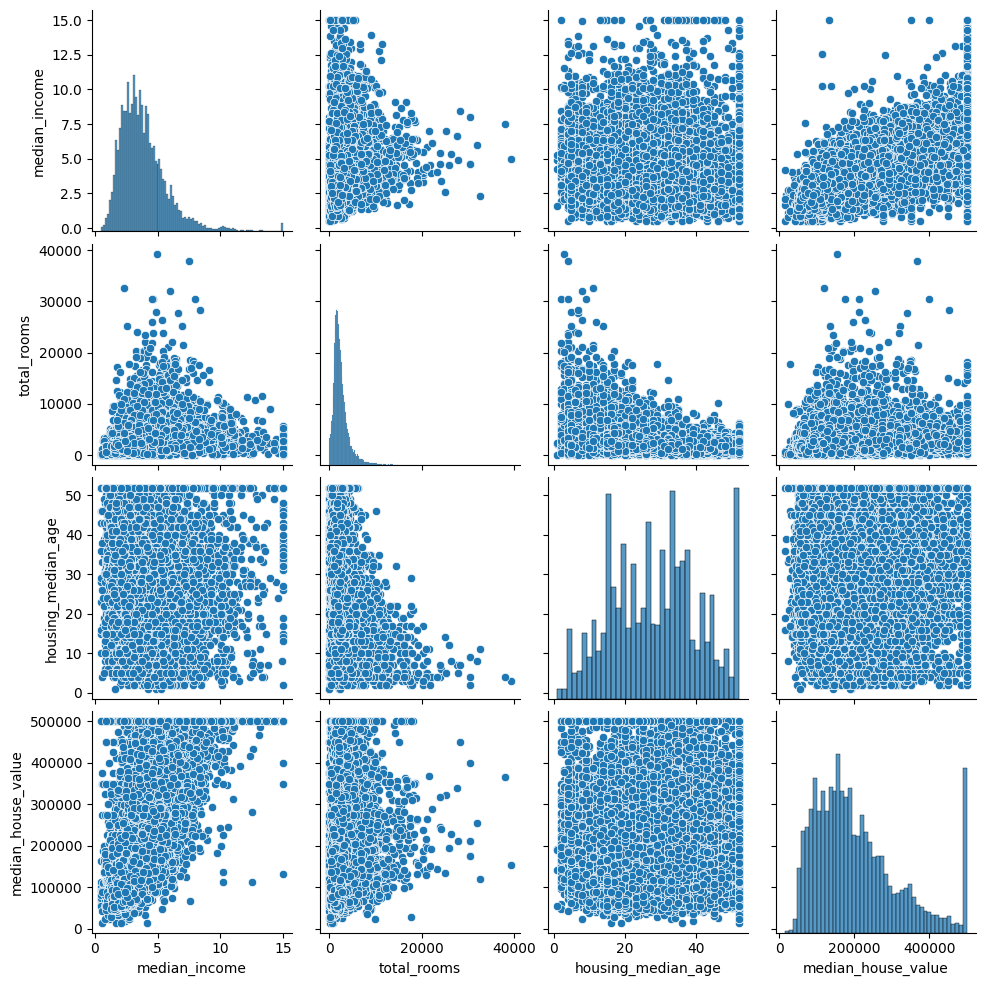

In [13]:
plt.figure(figsize=(15, 15))
sns.pairplot(temp_housing1.loc[:, ['median_income', 'total_rooms', 'housing_median_age', 'median_house_value']], dropna=True)
plt.show()

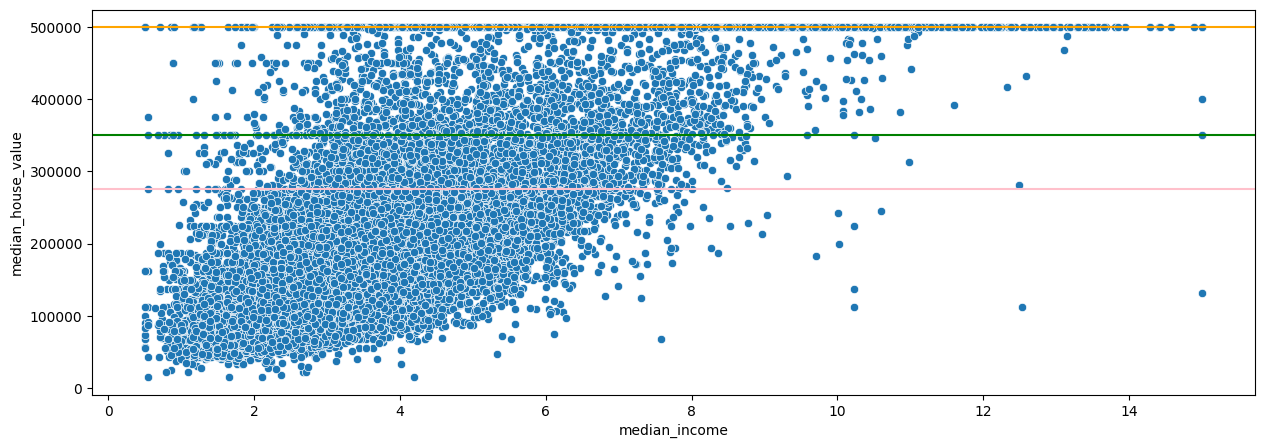

In [14]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x = temp_housing1['median_income'], y = temp_housing1['median_house_value'])
plt.axhline(y = 500000, color = 'orange')
plt.axhline(y = 350000, color = 'green')
plt.axhline(y = 275000, color = 'pink')

plt.show()

> The `price cap` that we noticed is clearly visible as a horizontal line at $500,000. But this plot reveals other less obvious straight lines: a horizontal line around $450,000, another around $350,000, perhaps one around $275,000, and a few more below that.

> You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

<hr>

> # **DATA PREPROCESSING**

Most Machine Learning algorithms cannot work with missing features, so let’s create a few functions to take care of them.

In [15]:
temp_housing2 = housing.copy()

temp_housing2['total_bedrooms'].isna().values.sum()

207

> ### HANDLING MISSING VALUES

>There are three ways of handling missing values<br>
>- Get rid of the corresponding districts - (rows).<br><br>
>- Get rid of the whole attribute.<br><br>
>- Set the values to some value (zero, the mean, the median, etc.).

In [16]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 20)
imputer.fit_transform(temp_housing1)[:, 4:5]
temp_housing1['total_bedrooms'] = imputer.fit_transform(temp_housing1)[:, 4:5]

In [17]:
temp_housing1['total_bedrooms'].isna().values.sum()

0

> ### OUTLIER DETECTION

1. Statistical Methods

    - Z-Score Method:

    - Modified Z-Score:

2. Visualization Methods

    - Box Plot:

    - Scatter Plot:

3. Machine Learning Methods

    - Isolation Forest:

    - Local Outlier Factor (LOF):

> ### <center>RESOLVING SECTION</center>

In [18]:
# # Using box plots

# temp_housing1_drop = temp_housing1.loc[:, ['longitude', 'latitude', 'housing_median_age',	'population', 'households',	'median_income', 'median_house_value', 'rooms_per_house', 'people_per_house', 'bedrooms_ratio']]

# idx = 0

# fig, ax = plt.subplots(nrows = 2, ncols = 5)

# for i in range(2):
#     for j in range(5):
#         ax[i, j].boxplot(temp_housing1_drop.iloc[:, idx])
#         idx += 1

# fig.set_figheight(20)
# fig.set_figwidth(20)

# plt.show()


In [19]:
# # Using IsolationForest

# from sklearn.ensemble import IsolationForest

# isolation_forest = IsolationForest(random_state=42)
# outlier_pred = isolation_forest.fit_predict(temp_housing1)

In [20]:
# print(outlier_pred)
# temp_housing1 = temp_housing1.iloc[outlier_pred == 1]

<hr>

> # **FEATURE ENGINEERING**

> Performing Attribute Combinations

In [21]:
temp_housing3 = temp_housing2.copy()

In [22]:
temp_housing3["rooms_per_house"] = temp_housing3["total_rooms"] / temp_housing3["households"]
temp_housing3["people_per_house"] = temp_housing3["population"] / temp_housing3["households"]
temp_housing3["bedrooms_ratio"] = temp_housing3["total_bedrooms"] / temp_housing3["total_rooms"]

In [23]:
corr_matrix = temp_housing3.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

> The new bedrooms_per_room attribute is much more correlated with
 the median house value than the total number of rooms or bedrooms.

> The houses with a lower bedroom/room ratio tend to be more expensive.

>The number of
 rooms per household is also more informative than the total number of rooms in a
 district—obviously the larger the houses, the more expensive they are.

<hr>

> # **FEATURE TRANSFORMATION**

- Techniques - 

    - Ordinal Encoding : When the categories have orders/weightage

    - Label Encoding : Same as Ordinal Encoding

    - One Hot Encoding : For Nominal Categories

> ### HANDLING CATEGORICAL AND TEXT ATTRIBUTES

In [68]:
temp_housing4 = temp_housing3.copy()

In [69]:
temp_housing4['ocean_proximity'].values.reshape(-1, 1)

array([['NEAR BAY'],
       ['NEAR BAY'],
       ['NEAR BAY'],
       ...,
       ['INLAND'],
       ['INLAND'],
       ['INLAND']], dtype=object)

In [70]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(temp_housing4['ocean_proximity'].values.reshape(-1, 1))

OneHotEncoder()

In [71]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [72]:
decoded = pd.DataFrame(
    ohe.transform(temp_housing4['ocean_proximity'].values.reshape(-1, 1)).toarray(),
    columns=['<1H_OCEAN', 'INLAND', 'ISLAND', 'NEAR_BAY', 'NEAR_OCEAN']   
)
decoded.head()

,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [73]:
temp_housing4 = pd.concat([temp_housing4, decoded], axis=1)

In [74]:
temp_housing4.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,people_per_house,bedrooms_ratio,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
3170,-116.99,33.20,17.0,2980.0,539.0,1531.0,505.0,3.1553,250000.0,<1H OCEAN,5.900990,3.031683,0.180872,1.0,0.0,0.0,0.0,0.0
14206,-118.00,33.77,24.0,1324.0,267.0,687.0,264.0,3.4327,192800.0,<1H OCEAN,5.015152,2.602273,0.201662,1.0,0.0,0.0,0.0,0.0
14720,-122.26,41.66,17.0,1885.0,350.0,953.0,328.0,2.1607,61400.0,INLAND,5.746951,2.905488,0.185676,0.0,1.0,0.0,0.0,0.0
19311,-117.81,33.87,19.0,4491.0,680.0,2457.0,702.0,6.0591,233500.0,<1H OCEAN,6.397436,3.500000,0.151414,1.0,0.0,0.0,0.0,0.0
16219,-117.10,32.58,29.0,1061.0,202.0,759.0,206.0,4.8646,136800.0,NEAR OCEAN,5.150485,3.684466,0.190386,0.0,0.0,0.0,0.0,1.0


> ### FEATURE TRANSFORMATION

In [75]:
# 'ocean_proximity' is already encoded so removing it
temp_housing5 = temp_housing4.drop('ocean_proximity', axis=1)
temp_housing5.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,people_per_house,bedrooms_ratio,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,2.555556,0.146591,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,2.109842,0.155797,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,2.802260,0.129516,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,2.547945,0.184458,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,2.181467,0.172096,0.0,0.0,0.0,1.0,0.0


> `StandardScaler` - Standardization is quite different: first it subtracts the mean value (so standardized
values always have a zero mean), and then it divides by the variance so that the result‐
ing distribution has unit variance. Unlike min-max scaling, standardization does not
bound values to a specific range, which may be a problem for some algorithms (e.g.,
neural networks often expect an input value ranging from 0 to 1). However, standard‐
ization is much less affected by outliers. For example, suppose a district had a median
income equal to 100 (by mistake). Min-max scaling would then crush all the other
values from 0–15 down to 0–0.15, whereas standardization would not be much affec‐
ted. Scikit-Learn provides a transformer called StandardScaler for standardization.

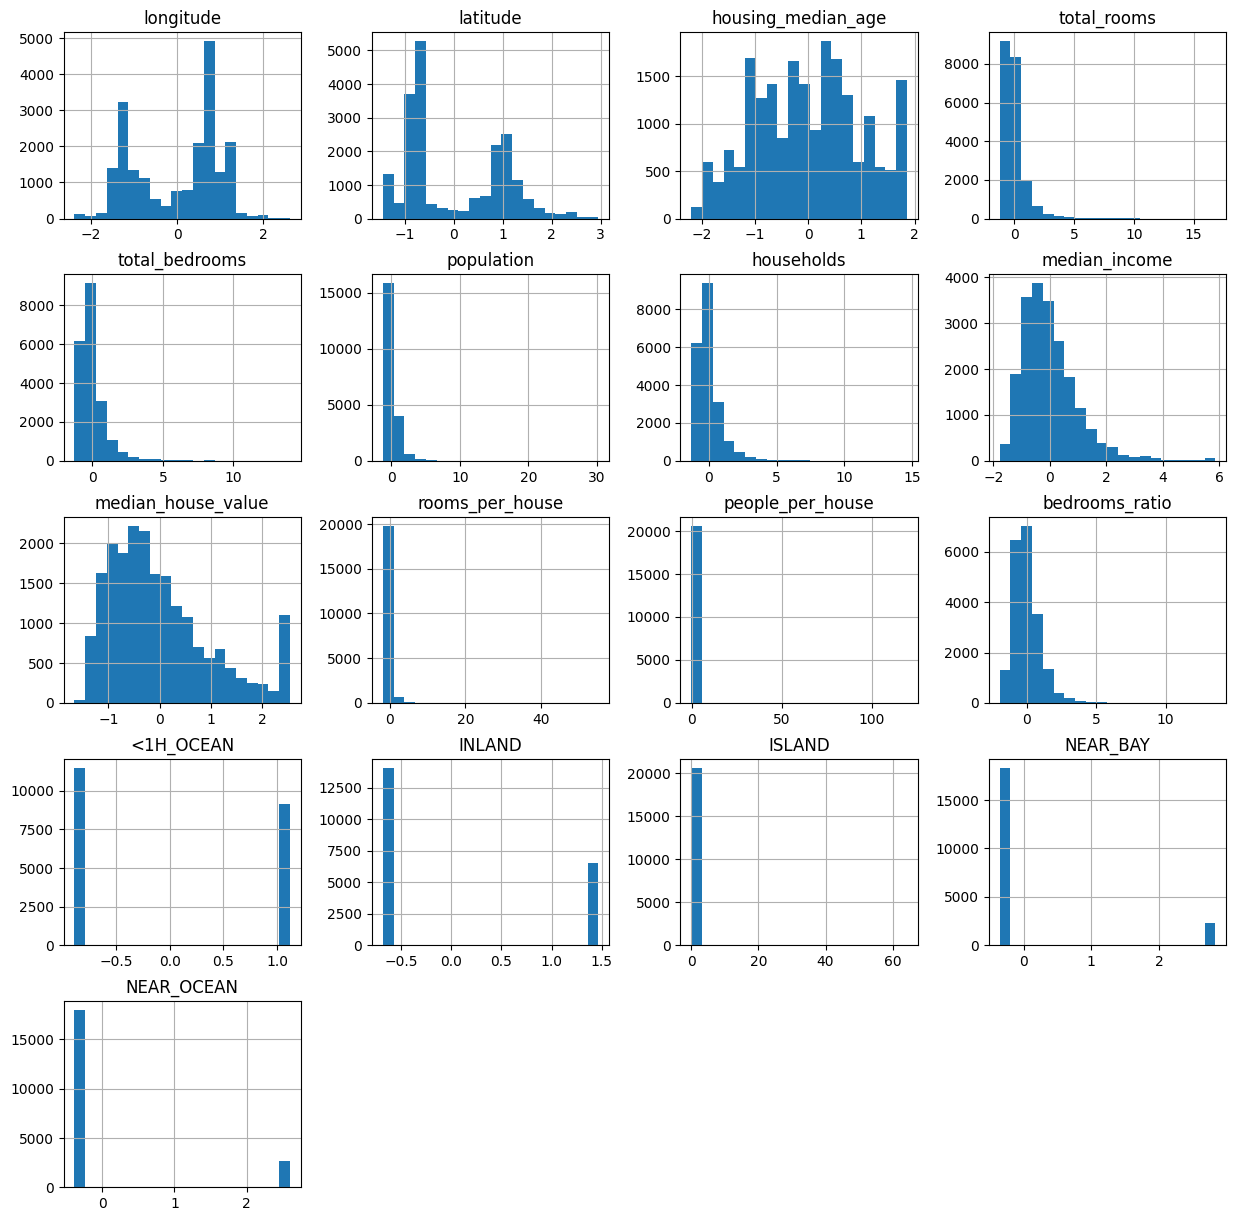

In [76]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_std = StandardScaler()
scaled_housing = pd.DataFrame(scaler_std.fit_transform(temp_housing5),columns=scaler_std.feature_names_in_)

scaled_housing.hist(bins=20, figsize=(15, 15))
plt.show()

> `MinMaxScaler` - Min-max scaling (many people call this normalization) is quite simple: values are
shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtract‐
ing the min value and dividing by the max minus the min. Scikit-Learn provides a
transformer called MinMaxScaler for this. It has a feature_range hyperparameter
that lets you change the range if you don’t want 0–1 for some reason.

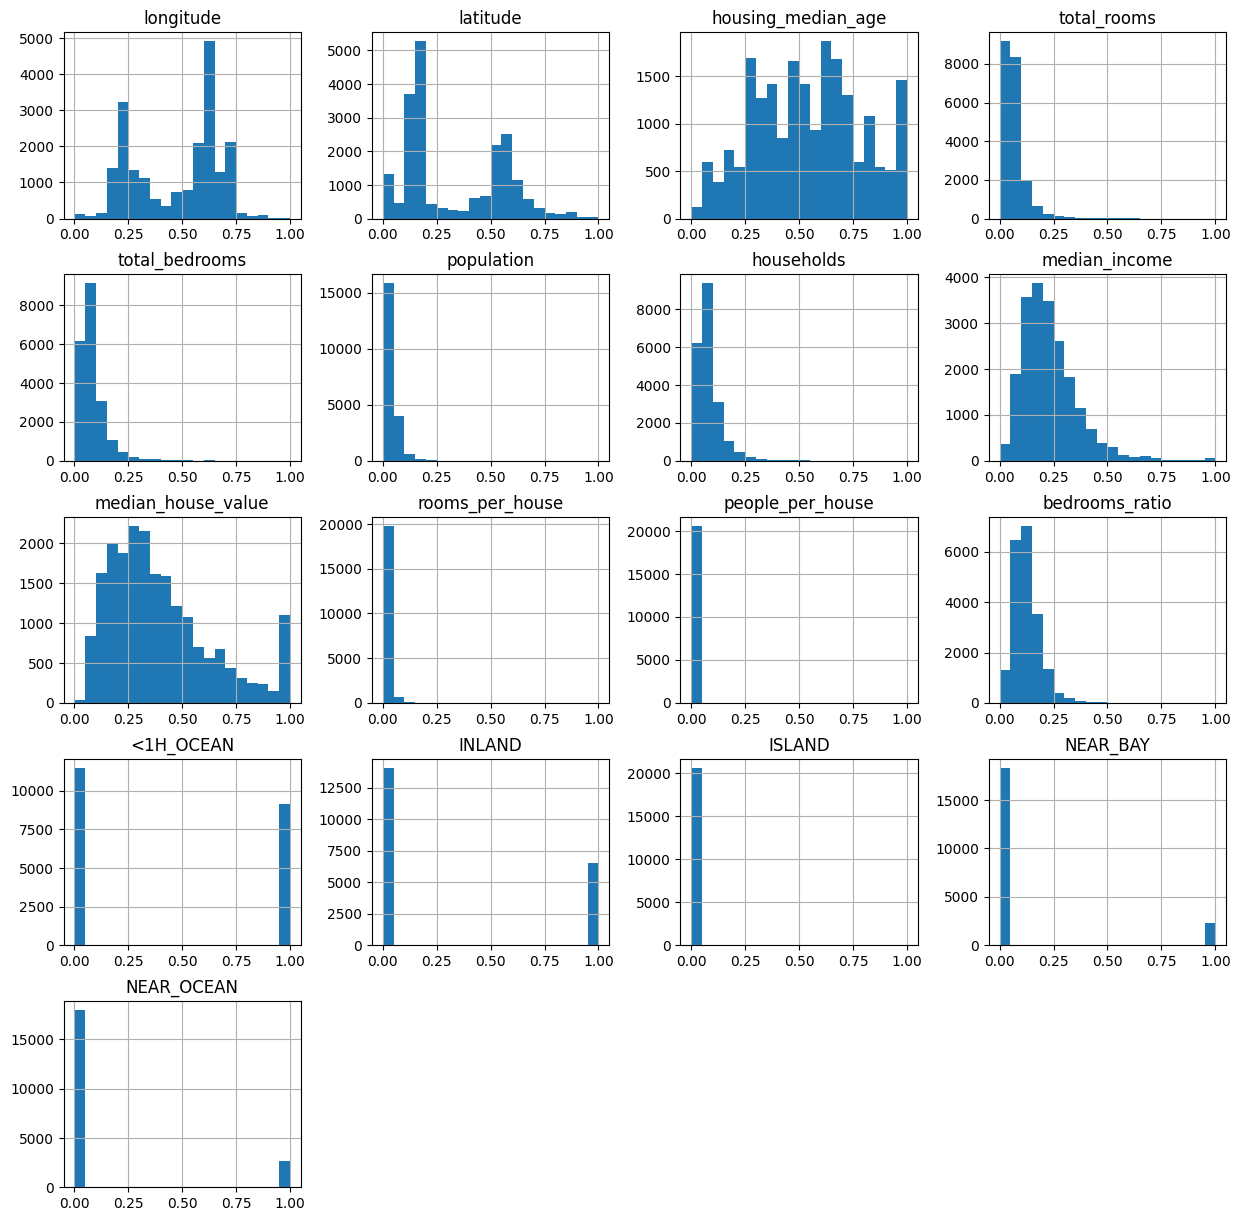

In [77]:
scaler_minmax = MinMaxScaler()
scaled_housing = pd.DataFrame(scaler_minmax.fit_transform(temp_housing5),columns=scaler_std.feature_names_in_)

scaled_housing.hist(bins=20, figsize=(15, 15))
plt.show()

> `log-transformation` - This transform is useful when there is a heavy tailed distribution (skewed)

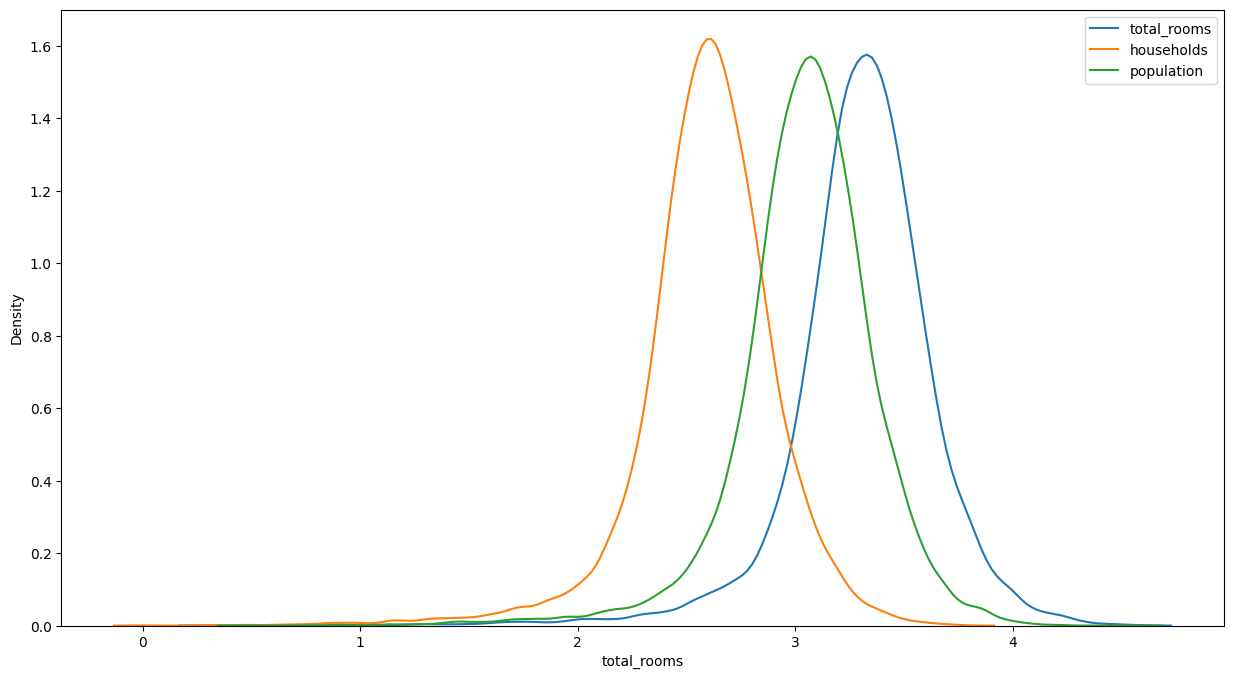

In [103]:
plt.figure(figsize=(15, 8))
sns.kdeplot(temp_housing5['total_rooms'].apply(np.log10), label = 'total_rooms')
sns.kdeplot(temp_housing5['households'].apply(np.log10), label = 'households')
sns.kdeplot(temp_housing5['population'].apply(np.log10), label = 'population')

plt.legend()
plt.show()

> `Bucketezing` - This transform is useful when there is a heavy tailed distribution (skewed)

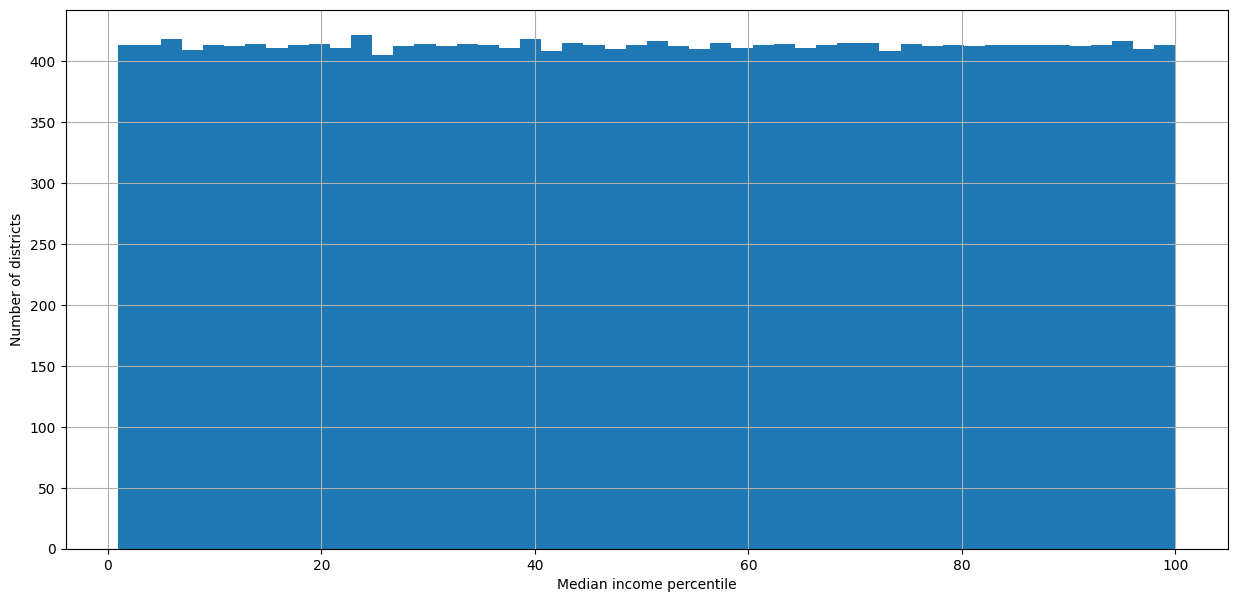

In [104]:
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
plt.figure(figsize=(15, 7))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()

> When a feature has a `MultiModal Distribution` it can also be `bucketizing` it, but treating buckets ID's as category rather than numerical values and transform them using `OneHotEncoding` - These transformation will perform good on `Regression` Models. 

In [105]:
bins = [ -np.inf, 11.2, 21.4, 31.6, 41.8, np.inf] # 1823, 4916, 4864, 5455, 3582
encoded = np.digitize(temp_housing5['housing_median_age'], bins=bins).reshape(-1, 1)

In [106]:
ohe = OneHotEncoder()
decoded = pd.DataFrame(ohe.fit_transform(encoded).toarray().astype(np.int64), 
            columns=[f"bin_{i}" for i in range(1, 6)]) / 5

temp_housing5 = pd.concat([temp_housing5, decoded], axis = 1)
temp_housing5.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,...,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN,bin_1,bin_2,bin_3,bin_4,bin_5
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.2,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,...,0.0,0.0,0.0,1.0,0.0,0.0,0.2,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.2


In [107]:
X = temp_housing5.drop('median_house_value', axis=1)
y = temp_housing5.loc[:, 'median_house_value']

In [108]:
X['total_bedrooms'] = X['total_bedrooms'].fillna(value=X['total_bedrooms'].mean())
X['bedrooms_ratio'] = X['bedrooms_ratio'].fillna(value=X['bedrooms_ratio'].mean())

> `LinearRegression` - just for checking the performance of this transformation

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r2_score(y, y_pred)

0.6553534510494254

<hr>

> # **DATA SAMPLING**

In [40]:
# housing["housing_cat"] = pd.cut(
#     x=housing['median_income'],
#     bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
#     labels=[1,2,3,4,5]
# )

In [41]:
# housing['housing_cat'].value_counts().sort_index().plot(kind='bar', grid=True, rot=0)
# plt.xlabel("Income category")
# plt.ylabel("Number of districts")
# plt.show()

> ### TRAIN TEST SPLITTING - `StratifiedShuffleSplit`

In [42]:
# split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# for train_idx, test_idx in split.split(X=housing, y=housing['housing_cat']):
#     train_set = housing.iloc[train_idx]
#     test_set = housing.iloc[test_idx]